## Context
Bitcoin is the longest running and most well known cryptocurrency, first released as open source in 2009 by the anonymous Satoshi Nakamoto. Bitcoin serves as a decentralized medium of digital exchange, with transactions verified and recorded in a public distributed ledger (the blockchain) without the need for a trusted record keeping authority or central intermediary. Transaction blocks contain a SHA-256 cryptographic hash of previous transaction blocks, and are thus "chained" together, serving as an immutable record of all transactions that have ever occurred. As with any currency/commodity on the market, bitcoin trading and financial instruments soon followed public adoption of bitcoin and continue to grow. Included here is historical bitcoin market data at 1-min intervals for select bitcoin exchanges where trading takes place. Happy (data) mining!

## Content
* coinbaseUSD1-mindata2014-12-01to_2019-01-09.csv

* bitstampUSD1-mindata2012-01-01to_2020-04-22.csv

CSV files for select bitcoin exchanges for the time period of Jan 2012 to April 2020, with minute to minute updates of OHLC (Open, High, Low, Close), Volume in BTC and indicated currency, and weighted bitcoin price. Timestamps are in Unix time. Timestamps without any trades or activity have their data fields filled with NaNs. If a timestamp is missing, or if there are jumps, this may be because the exchange (or its API) was down, the exchange (or its API) did not exist, or some other unforseen technical error in data reporting or gathering. All effort has been made to deduplicate entries and verify the contents are correct and complete to the best of my ability, but obviously trust at your own risk.

## Acknowledgements and Inspiration
Bitcoin charts for the data. The various exchange APIs, for making it difficult or unintuitive enough to get OHLC and volume data at 1-min intervals that I set out on this data scraping project. Satoshi Nakamoto and the novel core concept of the blockchain, as well as its first execution via the bitcoin protocol. I'd also like to thank viewers like you! Can't wait to see what code or insights you all have to share.

## Bitcoin price predction 

<p>Name: Arjun J.S</p>
<p>Batch: DSOCT01</p>


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
btcdf = pd.read_csv('bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv')

In [3]:
btcdf.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
btcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363457 entries, 0 to 4363456
Data columns (total 8 columns):
Timestamp            int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7), int64(1)
memory usage: 266.3 MB


In [5]:
btcdf.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.363457e+06,3.126480e+06,3.126480e+06,3.126480e+06,3.126480e+06,3.126480e+06,3.126480e+06,3.126480e+06
mean,1.456469e+09,3.674656e+03,3.677366e+03,3.671730e+03,3.674595e+03,9.855040e+00,2.884459e+04,3.674570e+03
std,7.573296e+07,3.935578e+03,3.939077e+03,3.931713e+03,3.935490e+03,3.229272e+01,1.010277e+05,3.935458e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.390770e+09,4.100000e+02,4.102400e+02,4.098300e+02,4.100000e+02,3.988120e-01,3.503759e+02,4.099998e+02
50%,1.456610e+09,1.175140e+03,1.175770e+03,1.174825e+03,1.175140e+03,1.990000e+00,2.620491e+03,1.175200e+03
75%,1.522062e+09,6.931175e+03,6.935780e+03,6.926790e+03,6.931225e+03,7.639098e+00,1.760057e+04,6.931180e+03
max,1.587514e+09,1.966576e+04,1.966600e+04,1.964996e+04,1.966575e+04,5.853852e+03,7.569437e+06,1.966330e+04


In [6]:
btcdf.isnull().any()

Timestamp            False
Open                  True
High                  True
Low                   True
Close                 True
Volume_(BTC)          True
Volume_(Currency)     True
Weighted_Price        True
dtype: bool

Currently timpstamp data shows data for ever minute. so, let's resample data to have the timestamp with a stamp every month.

In [7]:
# print(btcdf.Timestamp)

btcdf.Timestamp = pd.to_datetime(btcdf.Timestamp, unit = 's')
print(btcdf.Timestamp);

btcdf.index = btcdf.Timestamp

btcdf_copy=btcdf

# Monthly frequency
btcdf = btcdf_copy.resample('M').mean()

# Day frequency
btcdfday = btcdf_copy.resample('D').mean()

# Annual frequency
btcyear = btcdf_copy.resample('A-DEC').mean()

# Quarterly frequency
btcQut = btcdf_copy.resample('Q-DEC').mean()

0         2011-12-31 07:52:00
1         2011-12-31 07:53:00
2         2011-12-31 07:54:00
3         2011-12-31 07:55:00
4         2011-12-31 07:56:00
                  ...        
4363452   2020-04-21 23:56:00
4363453   2020-04-21 23:57:00
4363454   2020-04-21 23:58:00
4363455   2020-04-21 23:59:00
4363456   2020-04-22 00:00:00
Name: Timestamp, Length: 4363457, dtype: datetime64[ns]


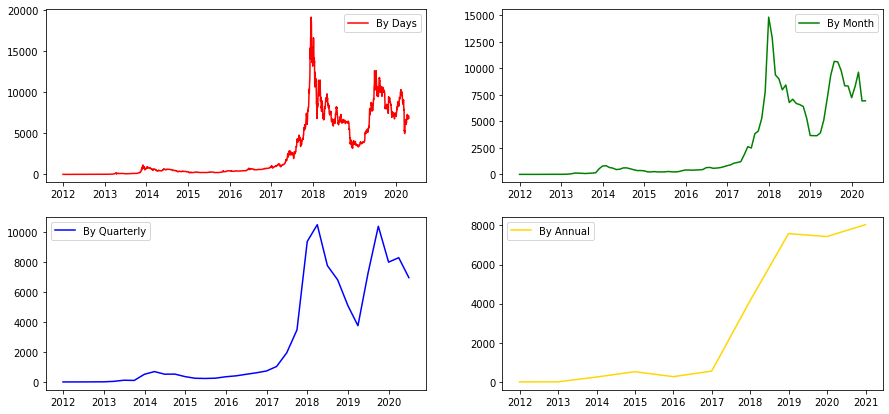

In [8]:
 plt.figure(figsize = (15,7))

plt.subplot(221)
sns.lineplot(data = btcdfday.Weighted_Price, label='By Days', color = 'red')

plt.subplot(222)
sns.lineplot(data = btcdf.Weighted_Price, label='By Month', color = 'green')

plt.subplot(223)
sns.lineplot(data = btcQut.Weighted_Price, label='By Quarterly', color = 'blue')

plt.subplot(224)
sns.lineplot(data = btcyear.Weighted_Price, label='By Annual', color = 'gold')

In [9]:
btcdf.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-31,6.345389,6.348982,6.341218,6.346148,4.031777,25.168238,6.345955
2012-02-29,5.230208,5.231646,5.227036,5.228510,8.313993,42.239422,5.228443
2012-03-31,4.985481,4.986695,4.982580,4.983828,15.197791,76.509751,4.984397
2012-04-30,4.995171,4.996447,4.993763,4.995079,21.683913,108.218094,4.995091


In [10]:
btcdf.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,2732.434016,2734.415482,2730.297625,2732.391032,11.316089,21421.572988,2732.372191
std,3656.070291,3659.234876,3652.597207,3655.986743,6.585612,32429.833033,3655.963706
min,4.465000,4.482500,4.465000,4.482500,2.930000,25.168238,4.471603
25%,233.653902,233.790847,233.507904,233.665302,5.853463,1841.273676,233.647840
50%,603.095083,603.273884,602.906874,603.089137,9.348805,5793.057808,603.090328
75%,5294.311246,5297.398747,5290.311303,5294.228904,14.239493,33322.413118,5293.800261
max,14843.232528,14865.433509,14815.368545,14843.091403,31.504424,186295.833352,14840.894239


In [11]:
btcdf.isnull().any()

Open                 False
High                 False
Low                  False
Close                False
Volume_(BTC)         False
Volume_(Currency)    False
Weighted_Price       False
dtype: bool

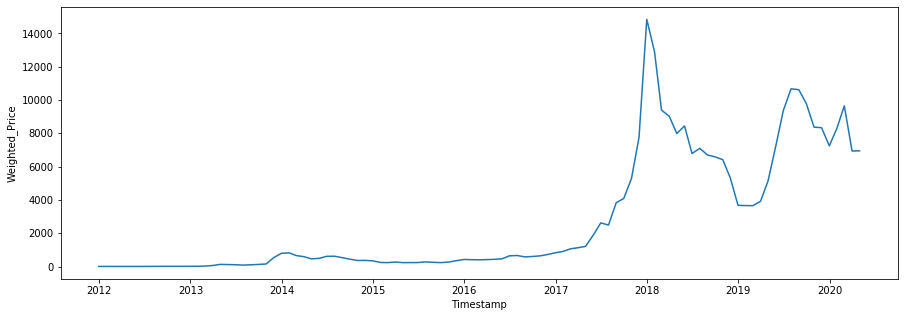

In [12]:
plt.figure(figsize = (15,5))
sns.lineplot(x = btcdf.index, y = btcdf.Weighted_Price)


implementation of time series analysis to make some meaning out of the given time series data.

<b>Here I am trying to implement ARIMA (Auto Regressive Integrated Moving Average) model to analyse our time series first. but our series data should be stationary. To do that we will be using below techniques</b>
<ol>
    <li>Seasonal Trend Decomposition</li>
    <li>Dicky Fuller test</li>
</ol>

why ARIMA?

ARIMA models allow both autoregressive (AR) components as well as moving average (MA) components. The (I) in ARIMA determines the level of differencing to use, which helps make the data stationary. ARIMA models are more flexible than other statistical models such as exponential smoothing or simple linear regression.

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox

#### Test for original prices series

In [14]:
#Creating functions to reduce testing code repeat.

def sea_decompose(Seriesdata):
    plt.figure(figsize = (15,7))
    sea_data=seasonal_decompose(Seriesdata);
    sea_data.plot()
    plt.show()
    
def Dicky_Fuller_Test(Seriesdata):
    testDF = adfuller(Seriesdata)
    print("Dicky Fuller test p-value : %.16f" %testDF[1] )
    
    
def dataPlot(Seriesdata):
    plt.figure(figsize = (10,6))
    sns.lineplot(data = Seriesdata, color = 'red', label = 'Observed line plot')
    sns.lineplot(data = Seriesdata.rolling(window = 12).mean(), color = 'green', label = 'Rolling mean, window -12')
    sns.lineplot(data = Seriesdata.rolling(window = 12).std(), color = 'blue', label = 'Rolling standard deviation, window -12')

Dicky Fuller Test
Dicky Fuller test p-value : 0.4192800058939636

seasonal decompose


<Figure size 1080x504 with 0 Axes>

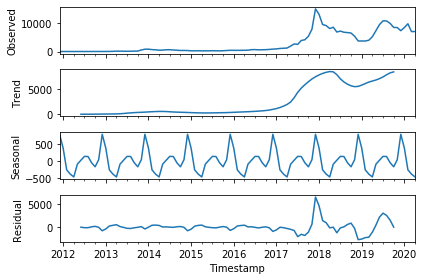

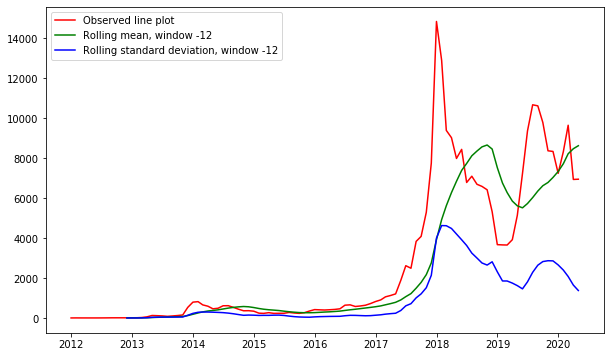

In [15]:
price = btcdf.Weighted_Price
print("Dicky Fuller Test")
Dicky_Fuller_Test(price)
print("\nseasonal decompose")
sea_decompose(price)

dataPlot(price)

By this visualisation and the p value of the Dicky Fuller test > 0.05, the series is not stationary and hence,so ARIMA model can't be applied immediatly. 

By implementing a few transformations, we can make our series suitable for ARIMA modelling.

### Transformations

#### Log Transformation

Dicky Fuller Test
Dicky Fuller test p-value : 0.4501384687841756

seasonal decompose


<Figure size 1080x504 with 0 Axes>

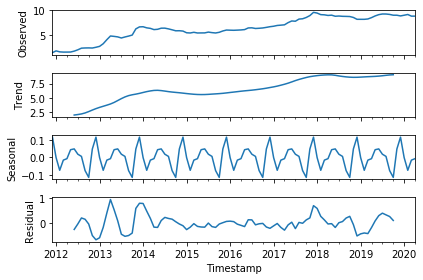

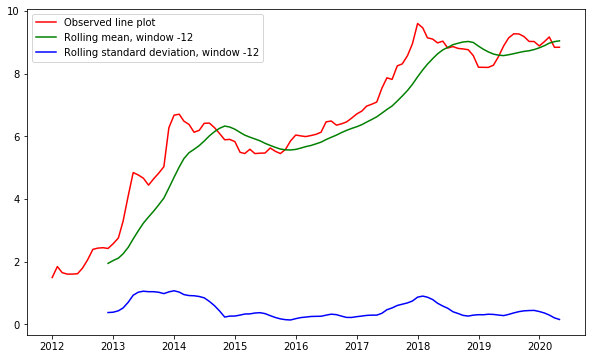

In [16]:
pricelog = np.log(price)

print("Dicky Fuller Test")
Dicky_Fuller_Test(pricelog)
print("\nseasonal decompose")
sea_decompose(pricelog)

dataPlot(pricelog)

Above log transformation for series are not stationary.

#### Box Cox power transform

Dicky Fuller Test
Dicky Fuller test p-value : 0.6165646629784411
lambda value: 0.12942142357566233

seasonal decompose


<Figure size 1080x504 with 0 Axes>

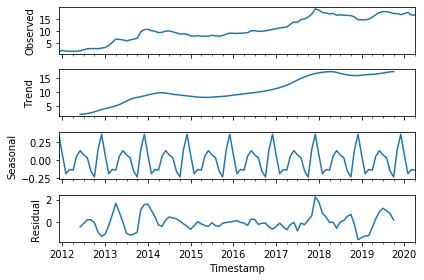

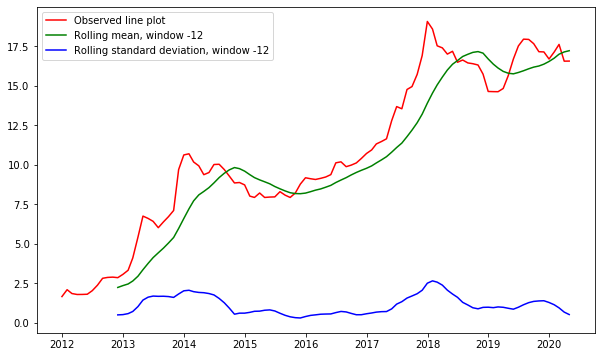

In [17]:
price_boxcox, lambdaData = boxcox(price)

#decompose functions requires a pandas object that has a timestamp index.
prices_box_cox = pd.Series(data = price_boxcox, index = btcdf.index)

print("Dicky Fuller Test")
Dicky_Fuller_Test(prices_box_cox)

print('lambda value:', lambdaData)

print("\nseasonal decompose")
sea_decompose(prices_box_cox)

dataPlot(prices_box_cox)


Above Box Cox power transform for series are not stationary.

#### Regular differentiation 
applied to log transformation price

Dicky Fuller Test
Dicky Fuller test p-value : 0.0000000215887397

seasonal decompose


<Figure size 1080x504 with 0 Axes>

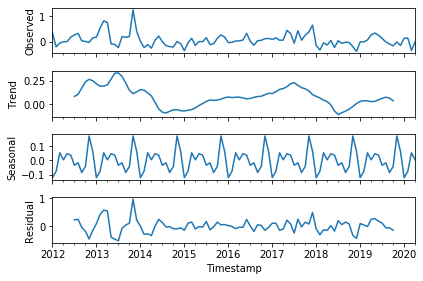

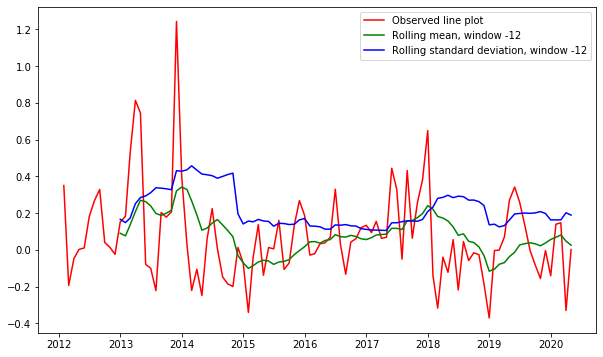

In [18]:
regularl_log_price = pricelog - pricelog.shift(1)
regularl_log_price.dropna(inplace = True)

print("Dicky Fuller Test")
Dicky_Fuller_Test(regularl_log_price)
print("\nseasonal decompose")
sea_decompose(regularl_log_price)

dataPlot(regularl_log_price)

#### Regular differentiation 
applied to box cox log transformation price

Dicky Fuller Test
Dicky Fuller test p-value : 0.0000000054645519

seasonal decompose


<Figure size 1080x504 with 0 Axes>

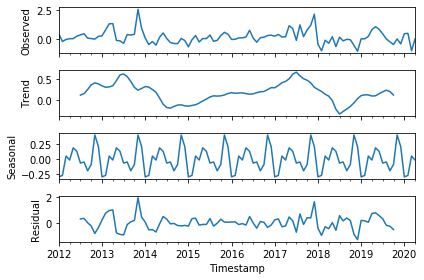

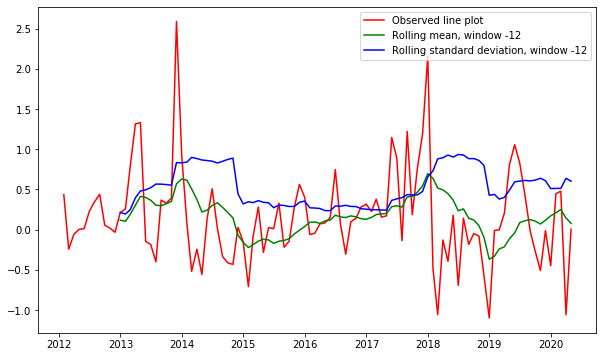

In [19]:
price_boxcox_reg = prices_box_cox - prices_box_cox.shift(1)
price_boxcox_reg.dropna(inplace = True)

print("Dicky Fuller Test")
Dicky_Fuller_Test(price_boxcox_reg)
print("\nseasonal decompose")
sea_decompose(price_boxcox_reg)

dataPlot(price_boxcox_reg)

After Regular differentiation our series data looks good and satisfactory

By ploting Autocorrelation and Partial Autocorrelation. We get an idea of the parameters to be used for using in ARIMA.

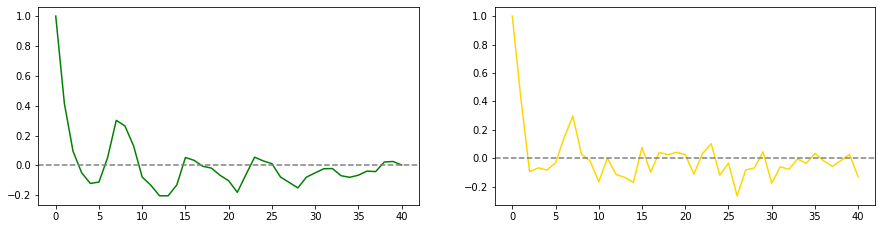

In [20]:
plt.figure(figsize = (15,8)) 
plot_acf = acf(regularl_log_price)
plot_pacf = pacf(regularl_log_price)

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

plt.subplot(221)
sns.lineplot(data = plot_acf, color = 'green')
plt.axhline(y=0, linestyle='--', color='gray')

plt.subplot(222)
sns.lineplot(data = plot_pacf, color = 'gold')
plt.axhline(y=0, linestyle='--', color='gray')

# fig.tight_laypout()

We infer from the plot that The ACF and PACF gets close to zero while lag approaches one.

As per the plots let us try different values of p and q. D = 1

In [21]:
from itertools import product
from numpy.linalg import LinAlgError

Rejected Parameters: (1, 1, 3)
(3, 1, 2) -10.044548949219347


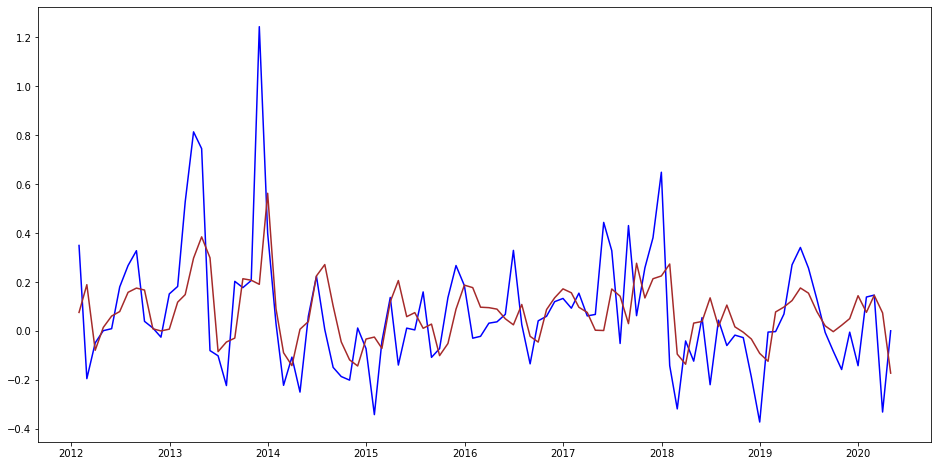

In [22]:
a = [[1,2,3], [1],[1,2,3]]
params = list(product(*a))

results = []   
min_aic = float('inf')
best_param = []

# checking different set of params for best fit
for param in params:
    try:
        model = ARIMA(pricelog, order = param).fit(disp = -1)
    except LinAlgError:
        print('Rejected Parameters:', param)
        continue
    except ValueError:
        print('Rejected Parameters:', param)
        continue
    if(min_aic > model.aic):
        min_aic = model.aic
        best_param = param
        best_model = model
        
    results.append([param, model.aic])

print(best_param,min_aic)
# print(results)

# print(best_model.fittedvalues)

plt.figure(figsize=(16,8))
sns.lineplot(data = regularl_log_price, color = 'blue')
sns.lineplot(data = best_model.fittedvalues, color = 'brown')    

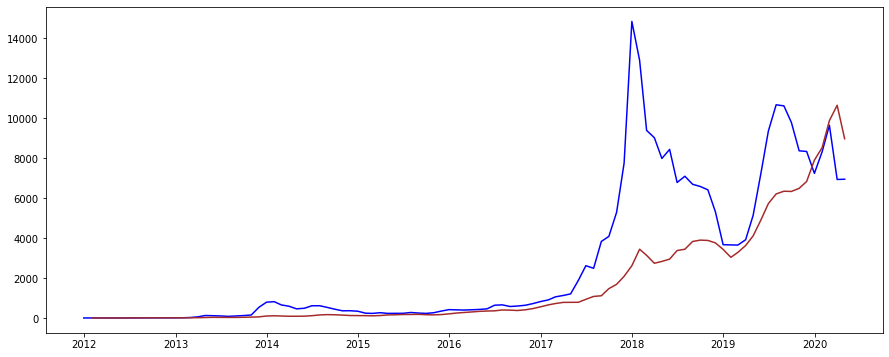

In [23]:
fitted_values = best_model.fittedvalues
fitted_values = fitted_values.cumsum()

fitted_values = fitted_values + pricelog[0]

final_values = np.exp(fitted_values)

d = {'prices' : price, 'pricelog' : pricelog, 'regularl_log_price' : regularl_log_price, 'fitted_values' : fitted_values, 'final_values' : final_values}
summaryDF = pd.DataFrame(data = d)
plt.figure(figsize=(15,6))
sns.lineplot(data = summaryDF['prices'], color = 'blue')
sns.lineplot(data = summaryDF['final_values'], color = 'brown')

### Final Price Prediction

For next one year.

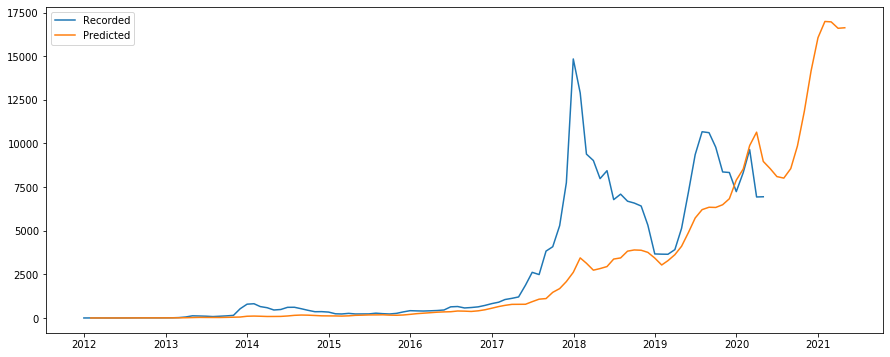

In [27]:
startMonth=1
endMonth=112 #2021-april
predicted_values = np.exp((best_model.predict(start = startMonth, end = endMonth).cumsum()) + pricelog[0])
plt.figure(figsize=(15,6))
sns.lineplot(data = price, label  = 'Recorded')
sns.lineplot(data = predicted_values, label = 'Predicted')
